In [1]:
import graphlab as gl
import pyLDAvis 
import pyLDAvis.graphlab
import pandas as pd
import ftfy

A newer version of GraphLab Create (v1.7.1) is available! Your current version is v1.6.1.

You can use pip to upgrade the graphlab-create package. For more information see https://dato.com/products/create/upgrade.
[INFO] This non-commercial license of GraphLab Create is assigned to kimitaka01@gmail.com and will expire on October 12, 2016. For commercial licensing options, visit https://dato.com/buy/.

[INFO] Start server at: ipc:///tmp/graphlab_server-63871 - Server binary: /Users/kimitakanakazawa/anaconda/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1450039495.log
[INFO] GraphLab Server Version: 1.6.1


# Goal:
- Find common words for negative and positive reivews
- Use it to hand label reviews
- Create word clouds from positive and negative data

### Read data

In [2]:
#Automatic Rendering of Visualisation
pyLDAvis.enable_notebook()

In [3]:
df = pd.read_csv('data/df_new_en.csv').drop('Unnamed: 0', 1)
df = df[['id','review_scores_rating','comments']]
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132332 entries, 0 to 132331
Data columns (total 3 columns):
id                      132332 non-null int64
review_scores_rating    132264 non-null float64
comments                132332 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 4.0+ MB


,id,review_scores_rating,comments
0,1994427,92,Great host. Provided special gift basket upon ...
1,1994427,92,Great host. Met me at apartment. Place was cle...
2,1994427,92,Syeda hosted my parents for four days during t...
3,1994427,92,I had a great experience at Syeda's Airbnb! It...
4,1994427,92,"Great location! Warm, welcoming host. This w..."


### Let's look at some room rating (aggregated rating)

- skew distribution

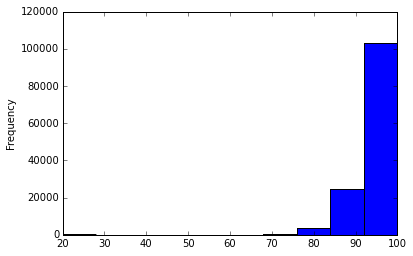

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
df.review_scores_rating.plot(kind='hist')

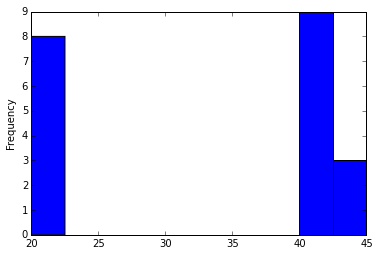

In [5]:
bad_rating = df[df.review_scores_rating < 50]
bad_rating.review_scores_rating.plot(kind='hist')

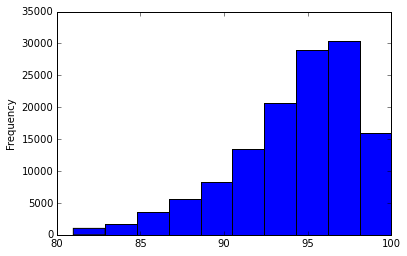

In [6]:
good_rating = df[df.review_scores_rating > 80]
good_rating.review_scores_rating.plot(kind='hist')

### Use graphlab to do topic modeling

In [7]:
bad_rating_gl = gl.SFrame(bad_rating)
good_rating_gl = gl.SFrame(good_rating)

### Unigram (Get rid of stop words)

In [8]:
bad_rating_gl['features'] = gl.text_analytics.count_ngrams(bad_rating_gl ['comments'],1).dict_trim_by_keys(gl.text_analytics.stopwords(), True)
good_rating_gl['features'] = gl.text_analytics.count_ngrams(good_rating_gl ['comments'],1).dict_trim_by_keys(gl.text_analytics.stopwords(), True)

### Set 4 topics 

In [9]:
b_topicModel=gl.topic_model.create(bad_rating_gl['features'],num_topics=4, num_iterations=50)
g_topicModel=gl.topic_model.create(good_rating_gl['features'],num_topics=4, num_iterations=50)

PROGRESS: Learning a topic model
PROGRESS:        Number of documents        20
PROGRESS:            Vocabulary size       427
PROGRESS:    Running collapsed Gibbs sampling
PROGRESS: +-----------+---------------+----------------+-----------------+
PROGRESS: | Iteration | Elapsed Time  | Tokens/Second  | Est. Perplexity |
PROGRESS: +-----------+---------------+----------------+-----------------+
PROGRESS: | 10        | 12.428ms      | 607882         | 0               |
PROGRESS: | 20        | 23.606ms      | 516318         | 0               |
PROGRESS: | 30        | 33.38ms       | 678768         | 0               |
PROGRESS: | 40        | 43.966ms      | 640041         | 0               |
PROGRESS: | 50        | 53.817ms      | 631525         | 0               |
PROGRESS: +-----------+---------------+----------------+-----------------+
PROGRESS: Learning a topic model
PROGRESS:        Number of documents    129678
PROGRESS:            Vocabulary size     37404
PROGRESS:    Running coll

### Rooms with bad rating

In [10]:
pyLDAvis.graphlab.prepare(b_topicModel, bad_rating_gl['features'])

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
1      26.435142        1       1  0.174038  0.182842
3      25.134304        1       2  0.097680 -0.100605
0      24.908057        1       3 -0.253175  0.100240
2      23.522497        1       4 -0.018544 -0.182477, topic_info=    Category       Freq          Term  Total  loglift  logprob
82   Default  11.000000          room     11  30.0000  30.0000
284  Default   9.000000      location      9  29.0000  29.0000
353  Default   9.000000        people      9  28.0000  28.0000
398  Default   9.000000         dirty      9  27.0000  27.0000
51   Default   9.000000         great      9  26.0000  26.0000
415  Default   7.000000          nice      7  25.0000  25.0000
248  Default   7.000000          told      7  24.0000  24.0000
55   Default   7.000000    experience      7  23.0000  23.0000
212  Default   7.000000           don      7  22.0000  22.0000
218  Default   7.000000         clean      7  21.0000  21.0000
419  Default   9.000000          stay      9  20.0000  20.0000
146  Default   8.000000         house      8  19.0000  19.0000
350  Default   6.000000         night      6  18.0000  18.0000
166  Default  11.000000         place     11  17.0000  17.0000
195  Default   8.000000           bed      8  16.0000  16.0000
186  Default   6.000000             2      6  15.0000  15.0000
155  Default   6.000000        airbnb      6  14.0000  14.0000
151  Default   6.000000        living      6  13.0000  13.0000
368  Default   5.000000          host      5  12.0000  12.0000
325  Default   5.000000          left      5  11.0000  11.0000
382  Default   5.000000          long      5  10.0000  10.0000
153  Default   5.000000         space      5   9.0000   9.0000
9    Default  12.000000     apartment     12   8.0000   8.0000
200  Default   4.000000   comfortable      4   7.0000   7.0000
356  Default   4.000000       lockbox      4   6.0000   6.0000
400  Default   4.000000        called      4   5.0000   5.0000
394  Default   4.000000          made      4   4.0000   4.0000
425  Default   4.000000          beds      4   3.0000   3.0000
70   Default   4.000000       working      4   2.0000   2.0000
426  Default   4.000000          time      4   1.0000   1.0000
..       ...        ...           ...    ...      ...      ...
327   Topic4   0.787276        stores      1   1.3386  -5.2504
326   Topic4   0.787276  accomodating      1   1.3386  -5.2504
317   Topic4   0.787276      cleaning      1   1.3386  -5.2504
311   Topic4   0.787276        advise      1   1.3386  -5.2504
303   Topic4   0.787276     awakening      1   1.3386  -5.2504
277   Topic4   0.787276        cancel      1   1.3386  -5.2504
302   Topic4   0.787276      canceled      1   1.3386  -5.2504
298   Topic4   0.787276   frustrating      1   1.3386  -5.2504
248   Topic4   6.718737          told      7   1.2574  -3.3856
55    Topic4   6.718737    experience      7   1.2574  -3.3856
415   Topic4   6.718737          nice      7   1.2574  -3.3856
368   Topic4   4.724652          host      5   1.2631  -3.7164
200   Topic4   3.729626   comfortable      4   1.2679  -3.9347
400   Topic4   3.729626        called      4   1.2679  -3.9347
356   Topic4   3.729626       lockbox      4   1.2679  -3.9347
173   Topic4   2.737530        floors      3   1.2760  -4.2143
197   Topic4   0.787276      supposed      1   1.3386  -5.2504
86    Topic4   1.752027          give      2   1.2920  -4.6037
45    Topic4   1.752027         hours      2   1.2920  -4.6037
285   Topic4   1.752027          mike      2   1.2920  -4.6037
294   Topic4   1.752027           air      2   1.2920  -4.6037
420   Topic4   1.752027   reservation      2   1.2920  -4.6037
185   Topic4   1.752027        needed      2   1.2920  -4.6037
214   Topic4   1.752027         clear      2   1.2920  -4.6037
114   Topic4   1.752027         ended      2   1.2920  -4.6037
211   Topic4   1.752027  refrigerator     

words: dirty, don't recomment, rude, loud

### Rooms with good rating

In [11]:
pyLDAvis.graphlab.prepare(g_topicModel, good_rating_gl['features'])

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
3      25.942508        1       1  0.333108 -0.101000
0      25.032146        1       2 -0.031173  0.148024
1      24.576564        1       3 -0.217332 -0.258271
2      24.448782        1       4 -0.084603  0.211248, topic_info=      Category          Freq           Term  Total  loglift  logprob
26435  Default  69591.000000          place  69591  30.0000  30.0000
10793  Default  45281.000000       location  45281  29.0000  29.0000
8031   Default  50916.000000      apartment  50916  28.0000  28.0000
34937  Default  36235.000000           host  36235  27.0000  27.0000
21273  Default  33622.000000    comfortable  33622  26.0000  26.0000
23557  Default  31429.000000            san  31429  25.0000  25.0000
13908  Default  27514.000000      recommend  27514  24.0000  24.0000
4492   Default  77340.000000           stay  77340  23.0000  23.0000
28487  Default  25282.000000           easy  25282  22.0000  22.0000
31749  Default  44079.000000          clean  44079  21.0000  21.0000
1874   Default  25230.000000        perfect  25230  20.0000  20.0000
29827  Default  97268.000000          great  97268  19.0000  19.0000
8561   Default  38181.000000           nice  38181  18.0000  18.0000
11457  Default  26831.000000      francisco  26831  17.0000  17.0000
18425  Default  18895.000000        helpful  18895  16.0000  16.0000
31404  Default  17976.000000           area  17976  15.0000  15.0000
33364  Default  17606.000000        staying  17606  14.0000  14.0000
4635   Default  37001.000000           room  37001  13.0000  13.0000
28611  Default  28182.000000           time  28182  12.0000  12.0000
6010   Default  19231.000000    restaurants  19231  11.0000  11.0000
4401   Default  29613.000000           home  29613  10.0000  10.0000
23418  Default  14344.000000         street  14344   9.0000   9.0000
34024  Default  27722.000000          house  27722   8.0000   8.0000
7772   Default  17584.000000          quiet  17584   7.0000   7.0000
3724   Default  17376.000000          close  17376   6.0000   6.0000
27810  Default  13332.000000           walk  13332   5.0000   5.0000
34008  Default  22398.000000           good  22398   4.0000   4.0000
4936   Default  15447.000000         lovely  15447   3.0000   3.0000
35958  Default  12002.000000        parking  12002   2.0000   2.0000
15946  Default  11932.000000        walking  11932   1.0000   1.0000
...        ...           ...            ...    ...      ...      ...
7268    Topic4   6737.013845           gave   7229   1.3303  -4.9175
3724    Topic4  15572.178722          close  17376   1.2918  -4.0790
27483   Topic4   1655.411283      traveling   1687   1.3823  -6.3206
11457   Topic4  23168.720867      francisco  26831   1.2540  -3.6824
27955   Topic4   4221.425404        friends   4480   1.3418  -5.3845
3628    Topic4   3091.900932        station   3255   1.3498  -5.6959
26435   Topic4  56450.504902          place  69591   1.1935  -2.7898
18049   Topic4   6355.107101           cozy   6996   1.3047  -4.9758
32689   Topic4   3225.408959           tips   3423   1.3419  -5.6535
9074    Topic4  10780.989255          hosts  12966   1.2162  -4.4474
6622    Topic4   9184.031710      welcoming  10933   1.2274  -4.6067
25229   Topic4   9518.290551         airbnb  11392   1.2227  -4.5703
1581    Topic4   3995.765789         couple   4441   1.2953  -5.4398
28611   Topic4  20101.167376           time  28182   1.0645  -3.8228
4664    Topic4  10604.466242        amazing  13530   1.1594  -4.4616
237     Topic4  10514.134627         needed  13487   1.1520  -4.4722
15534   Topic4  11453.672321           back  15421   1.1061  -4.3841
20959   Topic4  10413.551745         highly  13874   1.1165  -4.4794
34673   Topic4   8708.414089          loved  11181   1.1521  -4.6596
27976   Topic4  12562.990176           made  18182   1.0323  -4.2932
21835   Topic4   7194.510266  accommodating  

words: wonderful, fantastic, lovely, highly recommend

# Word cloud

In [12]:
import pandas as pd
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [13]:
import random
import re
import numpy as np
import nltk
def some(x, n):
    return x.ix[random.sample(x.index, n)]
print np.shape(good_rating), np.shape(bad_rating)
good_wc = some(good_rating['comments'],1000)
bad_wc = bad_rating['comments']
print np.shape(good_wc), np.shape(bad_wc)
# text_1.replace(".,:;", " ")
# text_5.replace(".,:;", " ")
good_words = " ".join(good_wc).lower()
bad_words = " ".join(bad_wc).lower()
good_words = re.split('\W+', good_words)
bad_words = re.split('\W+', bad_words)
good_words = " ".join(good_words)
bad_words = " ".join(bad_words)

(129678, 3) (20, 3)
(1000,) (20,)


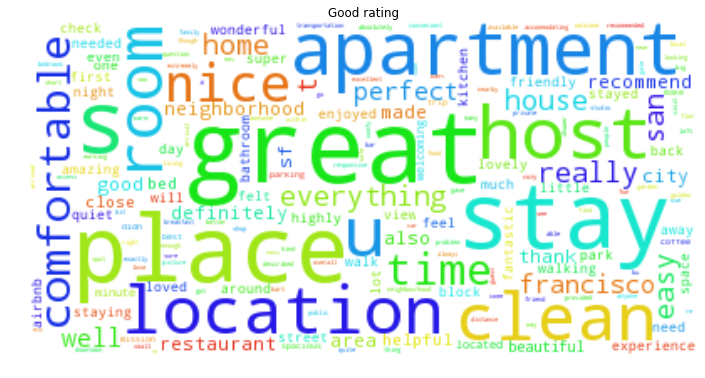

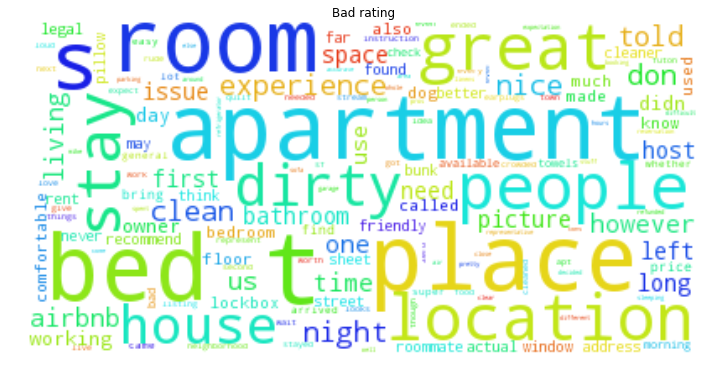

In [16]:
from os import path
from wordcloud import WordCloud

# GOOD
# Generate a word cloud image
wordcloud = WordCloud().generate(good_words)

# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(background_color="white",max_font_size=60, relative_scaling=.5).generate(good_words)
plt.figure(figsize=(12,15))
plt.imshow(wordcloud)
plt.title('Good rating')
plt.axis("off")
plt.show()

# BAD
# Generate a word cloud image
wordcloud = WordCloud().generate(bad_words)

# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(background_color="white",max_font_size=60, relative_scaling=.5).generate(bad_words)
plt.figure(figsize=(12,15))
plt.imshow(wordcloud)
plt.title('Bad rating')
plt.axis("off")
plt.show()


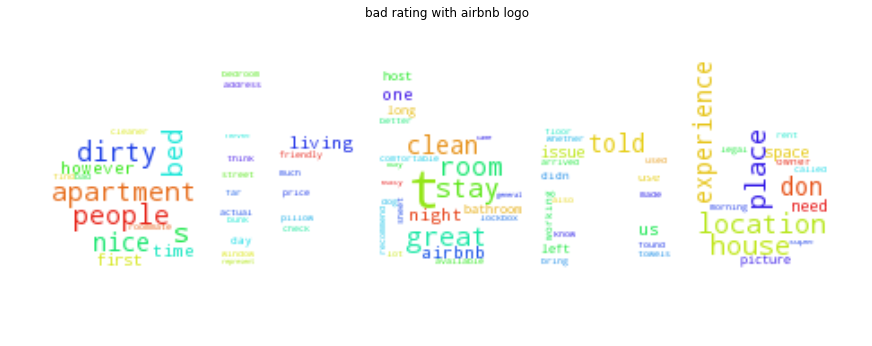

In [17]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

text = bad_words

alice_mask = np.array(Image.open("airbnb_logo_letter.png"))
wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask, max_font_size=30, relative_scaling=.1)
wc.generate(text)

plt.figure(figsize=(15,15))
plt.imshow(wc)
plt.title('bad rating with airbnb logo')
plt.axis("off")

plt.show()

## Making training data with common words appeared in reviews of positively/negatively rated rooms

In [186]:
import pandas as pd
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df_original = pd.read_csv('data/df_new_en.csv').drop('Unnamed: 0', 1)
df = df_original[['review_id','review_scores_rating','comments']]
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132332 entries, 0 to 132331
Data columns (total 3 columns):
review_id               132332 non-null int64
review_scores_rating    132264 non-null float64
comments                132332 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 4.0+ MB


,review_id,review_scores_rating,comments
0,10612780,92,Great host. Provided special gift basket upon ...
1,49925683,92,Great host. Met me at apartment. Place was cle...
2,50537634,92,Syeda hosted my parents for four days during t...
3,51077613,92,I had a great experience at Syeda's Airbnb! It...
4,52109034,92,"Great location! Warm, welcoming host. This w..."


### Word list

In [187]:
good_word_list = ['wonderful', 'fantastic', 'lovely', 'highly recommend','definitely recommend','would recommend','can recommend','great host']
bad_word_list = ['dirty',"don t recomment","would not recomment","do not recomment","wouldn t recomment","won t recomment",'will not recomment']

In [188]:
bad_word_list

['dirty',
 'don t recomment',
 'would not recomment',
 'do not recomment',
 'wouldn t recomment',
 'won t recomment',
 'will not recomment']

In [189]:
import nltk
import re
from nltk.corpus import stopwords # Import the stop word list
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')


def preprocessing(x): # x = reviews
    x = str(x)
    x = x.decode("utf8")
#     x = unicode(x, 'utf-8')    
#     try:
    x = re.sub("[^a-zA-Z]", " ", x)    
    x = x.lower().split()
    return " ".join(x)
#     except:
#         if x == float:
#             return " "

df.comments = df.comments.apply(preprocessing)
# preprocessing(df.comments[0])

In [190]:
df.head()

,review_id,review_scores_rating,comments
0,10612780,92,great host provided special gift basket upon a...
1,49925683,92,great host met me at apartment place was clean...
2,50537634,92,syeda hosted my parents for four days during t...
3,51077613,92,i had a great experience at syeda s airbnb it ...
4,52109034,92,great location warm welcoming host this was a ...


### Create good/bad review ID lists

In [191]:
good_review_id = []
bad_review_id = []
for index, comment in enumerate(df.comments):
    for good_word in good_word_list:
        if good_word in comment:
            good_review_id.append(df['review_id'][index])
            
for index, comment in enumerate(df.comments):
    for bad_word in bad_word_list:
        if bad_word in comment:
            bad_review_id.append(df['review_id'][index])

good_review_id = list(set(good_review_id))
bad_review_id = list(set(bad_review_id))

In [192]:
print len(set(good_review_id)), len(set(bad_review_id))
print good_review_id[:10]
print bad_review_id[:10]

57864 435
[47972353, 27131907, 29360132, 12910251, 18022401, 393224, 46399497, 2097162, 10092555, 19922958]
[15396866, 48279559, 25536521, 11956237, 13436943, 6602414, 29671448, 27538095, 14514204, 49692703]


In [193]:
print len(df)

132332


In [194]:
(len(good_review_id)+len(bad_review_id)+0.)/ len(df)

0.4405510382976151

### Covers about 44% of entire reviews

In [195]:
df["Sentiment"] = "No_label"
df.head()

/Users/kimitakanakazawa/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,review_id,review_scores_rating,comments,Sentiment
0,10612780,92,great host provided special gift basket upon a...,No_label
1,49925683,92,great host met me at apartment place was clean...,No_label
2,50537634,92,syeda hosted my parents for four days during t...,No_label
3,51077613,92,i had a great experience at syeda s airbnb it ...,No_label
4,52109034,92,great location warm welcoming host this was a ...,No_label


In [196]:
from collections import Counter
Counter(df.Sentiment)

Counter({'No_label': 132332})

In [197]:
len(df)/100

1323

### Make positive=1, negative=-1, non-label as "No_label" for now

In [198]:
df.ix[df['review_id'].isin(bad_review_id), 'Sentiment']= -1
df.ix[df['review_id'].isin(good_review_id), 'Sentiment']=1


In [199]:
df.head(40)
print Counter(df.Sentiment)
print len(good_review_id), len(bad_review_id)
# neutral = 

Counter({'No_label': 74117, 1: 57864, -1: 351})
57864 435


In [200]:
[item for item in df[df.Sentiment == -1][:100]['comments']]

[u'chuck was nice and here if we needed something only negative point was that it was dirty in the sharing area but if you only look for a room its for you he gave us some information about events which were quite nice',
 u'the apartment was super cute in a cool neighborhood but i can t say it was my best airbnb experience after communicating twice that we were arriving in the morning we got an email the day before arriving that the apartment would not be ready until the afternoon for cleaning services unfortunately those services did not include cleaning up a sink full to the top of dirty dishes also be aware that the host s cat who is super cute and friendly and neighbor s cat will be very much an interactive part of your stay in the apartment it was a surprise to us as my friend has a cat allergy and i didn t recall seeing a cat mentioned in the profile would have been a perfect stay if the apartment was as clean as the photos and with a little more responsive communication',
 u'i m

In [201]:
print len(df), len(df_original)

132332 132332


In [202]:
df.head(1)

,review_id,review_scores_rating,comments,Sentiment
0,10612780,92,great host provided special gift basket upon a...,1


In [32]:
df.comments = df_original.comments

In [33]:
df = df.sort(columns=['Sentiment'], ascending=False)

/Users/kimitakanakazawa/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [151]:
len(df)

132332

### Export

In [204]:
df.to_csv('data/df_new_en_labeled.csv')

In [203]:
Counter(df.Sentiment)

Counter({-1: 351, 1: 57864, 'No_label': 74117})

In [111]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
blob = TextBlob("I love this library", analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='pos', p_pos=0.7996209910191279, p_neg=0.2003790089808724)

In [119]:
text = "The apartment was super cute in a cool neighborhood, but I can't say it was my best airbnb experience. After communicating twice that we were arriving in the morning, we got an email the day before arriving that the apartment would not be ready until the afternoon for cleaning services. Unfortunately those services did not include cleaning up a sink full to the top of dirty dishes. Also be aware that the host's cat (who is super cute and friendly) and neighbor's cat will be very much an interactive part of your stay in the apartment. It was a surprise to us as my friend has a cat allergy and I didn't recall seeing a cat mentioned in the profile. Would have been a perfect stay if the apartment was as clean as the photos and with a little more responsive communication."
blob = TextBlob(text, analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='pos', p_pos=0.5529381937228622, p_neg=0.4470618062771384)

In [113]:
df = pd.read_csv('data/df_new_en_labeled.csv').drop('Unnamed: 0', 1)
df.head()

,review_id,review_scores_rating,comments,Sentiment
0,10612780,92,Great host. Provided special gift basket upon ...,1
1,49925683,92,Great host. Met me at apartment. Place was cle...,1
2,50537634,92,Syeda hosted my parents for four days during t...,No_label
3,51077613,92,I had a great experience at Syeda's Airbnb! It...,1
4,52109034,92,"Great location! Warm, welcoming host. This w...",No_label


In [117]:
[item for item in df[df.Sentiment == '0']['comments']]

['Chuck was nice and here if we needed something.only negative point was that it was dirty in the sharing area but if you only look for a room its for you. He gave us some information about events which were quite nice.',
 "The apartment was super cute in a cool neighborhood, but I can't say it was my best airbnb experience. After communicating twice that we were arriving in the morning, we got an email the day before arriving that the apartment would not be ready until the afternoon for cleaning services. Unfortunately those services did not include cleaning up a sink full to the top of dirty dishes. Also be aware that the host's cat (who is super cute and friendly) and neighbor's cat will be very much an interactive part of your stay in the apartment. It was a surprise to us as my friend has a cat allergy and I didn't recall seeing a cat mentioned in the profile. Would have been a perfect stay if the apartment was as clean as the photos and with a little more responsive communication